In [248]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score

In [197]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

In [198]:
lfw_dataset.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [249]:
print(lfw_dataset.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [199]:
lfw_dataset.images.shape

(1140, 62, 47)

In [200]:
lfw_dataset.data.shape

(1140, 2914)

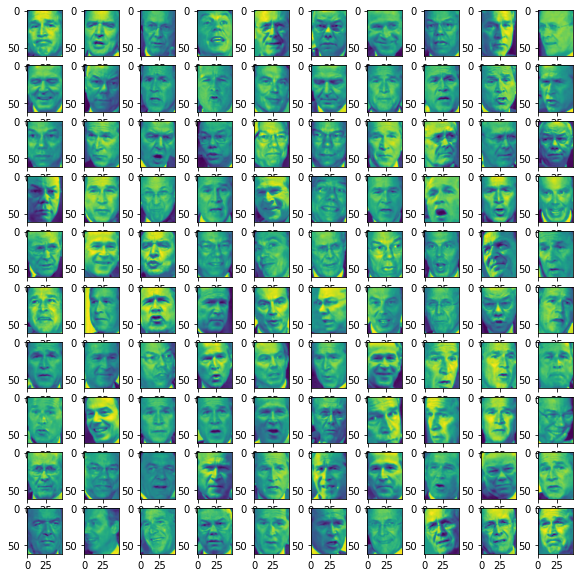

In [201]:
def plot_images(lfw_dataset):
    fig = plt.figure(figsize=(10,10))
    for i in range(100):
        ax = fig.add_subplot(10, 10 , i+1)
        ax.imshow(lfw_dataset.images[i])
        
plot_images(lfw_dataset)

In [202]:
x,y = lfw_dataset.data,lfw_dataset.target

In [203]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [204]:
def pca_components(pca):
    k = 0
    total = sum(pca.explained_variance_)
    current = 0 
    while current/total < 0.95:
        current= current + pca.explained_variance_[k]
        k+=1
    return k

In [205]:
pca = PCA()
pca.fit_transform(X_train)
pca.tranform(X_test)

PCA()

In [206]:
n_components = pca_components(pca)
n_components

115

In [207]:
pca_clf     = PCA(n_components=n_components,whiten=True)
pca_x_train = pca_clf.fit_transform(X_train)
pca_x_test  = pca_clf.transform(X_test)

In [208]:
def modelling(X_train,y_train,X_test,y_test):
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(f"\n")
    print(confusion_matrix(y_test,y_pred))
    print(f"Accuracy Score: {accuracy_score(y_test, predictions)}")

In [209]:
%time
print("WITHOUT PCA")
modelling(X_train,y_train,X_test,y_test)

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 11.9 µs
WITHOUT PCA
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        83
           1       1.00      0.31      0.47        42
           2       0.66      0.98      0.79       178
           3       0.89      0.23      0.36        35
           4       0.65      0.33      0.44        39

    accuracy                           0.72       377
   macro avg       0.81      0.52      0.57       377
weighted avg       0.76      0.72      0.68       377



[[ 62   0  21   0   0]
 [  5  13  23   0   1]
 [  2   0 174   1   1]
 [  1   0  21   8   5]
 [  1   0  25   0  13]]
Accuracy Score: 0.6259946949602122


In [210]:
%time
print("WITH PCA")
modelling(pca_x_train, y_train, pca_x_test, y_test)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
WITH PCA
              precision    recall  f1-score   support

           0       0.92      0.54      0.68        83
           1       0.75      0.14      0.24        42
           2       0.56      0.98      0.72       178
           3       1.00      0.03      0.06        35
           4       0.91      0.26      0.40        39

    accuracy                           0.63       377
   macro avg       0.83      0.39      0.42       377
weighted avg       0.74      0.63      0.56       377



[[ 45   0  38   0   0]
 [  1   6  35   0   0]
 [  2   2 174   0   0]
 [  1   0  32   1   1]
 [  0   0  29   0  10]]
Accuracy Score: 0.6259946949602122


In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [213]:
rf_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_clf,param_grid=param_grid,cv = 3,verbose = 2,n_jobs = -1)

In [214]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.2min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [215]:
best_param = grid_search.best_estimator_
best_param

RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)

In [216]:
best_param.fit(X_train,y_train)

RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)

In [217]:
predictions = best_param.predict(X_test)
print(accuracy_score(y_test, predictions))

0.6127320954907162


## Using K-Fold

In [241]:
from sklearn.model_selection import KFold

In [246]:
def run_kfold(x,y,clf):
    k_fold = KFold(n_splits = 10,random_state = 2021)
    outcomes = []
    fold = 0
    for train_idx,test_idx in k_fold.split(x):
        fold+=1
        X_train,X_test = x[train_idx], x[test_idx]
        y_train,y_test = y[train_idx], y[test_idx]
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))  
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

In [247]:
run_kfold(x,y,best_param)

Fold 1 accuracy: 0.6403508771929824
Fold 2 accuracy: 0.6491228070175439
Fold 3 accuracy: 0.6228070175438597
Fold 4 accuracy: 0.543859649122807
Fold 5 accuracy: 0.631578947368421
Fold 6 accuracy: 0.6929824561403509
Fold 7 accuracy: 0.5614035087719298
Fold 8 accuracy: 0.5526315789473685
Fold 9 accuracy: 0.5877192982456141
Fold 10 accuracy: 0.6228070175438597
Mean Accuracy: 0.6105263157894737
